#Implementing MobileNet Classifier
- Objective is to create MobileNet Classifier for chest XRays to predict Pneumonia
- Load Train and Test data from saved and pickled data of 15,000 XRays
- Create Mobilenet model with imagenet weights with transfer learning and perform partial learning
- Tune hyperparameters
- Run the model till acceptable prediction accuracy is established.
- Make sure to not overfit or underfit

In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import random
import sklearn
import cv2

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
tr_x = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainX_n.npy"
tr_y = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainY_n.npy"
t_x = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testX_n.npy"
t_y = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testY_n.npy"


file = open(tr_x, 'rb')
trainX = np.load(file)
file.close()
print("Loaded",tr_x)

file = open(tr_y, 'rb')
trainY = np.load(file)
file.close()
print("Loaded",tr_y)

file = open(t_x, 'rb')
testX = np.load(file)
file.close()
print("Loaded",t_x)

file = open(t_y, 'rb')
testY = np.load(file)
file.close()
print("Loaded",t_y)


Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainX_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of trainY_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testX_n.npy
Loaded /content/drive/My Drive/CAPSTONE-PROJECT/rsna/TrainData/Copy of testY_n.npy


In [ ]:
ALPHA = 0.5
#hyper params
INIT_LR = .001
EPOCHS = 10
BS = 8
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
metrics = ["accuracy"]

In [ ]:
base_mobilenet_model = MobileNet(input_shape=(224, 224, 3), include_top=False, alpha=ALPHA, weights="imagenet")
headModel = base_mobilenet_model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)
mobilenet_model = Model(inputs=base_mobilenet_model.input, outputs=headModel)

#Train all layers after 10th layer
layer_idx = 0
for layer in base_mobilenet_model.layers:
  if(layer_idx > 10):
    layer.trainable = True
  else:
    layer.trainable = False
  layer_idx+=1
mobilenet_model.summary()

5578752/5577668 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 16)      432       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 16)      64        
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 16)      144       
________________________________________________________________

In [ ]:
mobilenet_model.compile(opt, loss="binary_crossentropy", metrics=metrics)
mobilenet_model.fit(trainX,trainY,batch_size=BS,epochs=EPOCHS, validation_data=(testX, testY))

Epoch 1/10
1200/1200 [==============================] - 40s 33ms/step - loss: 0.6775 - accuracy: 0.6274 - val_loss: 0.4826 - val_accuracy: 0.7708
Epoch 2/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.5752 - accuracy: 0.6915 - val_loss: 0.4820 - val_accuracy: 0.7546
Epoch 3/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.5711 - accuracy: 0.7021 - val_loss: 0.5139 - val_accuracy: 0.7646
Epoch 4/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.5578 - accuracy: 0.7106 - val_loss: 0.5133 - val_accuracy: 0.7454
Epoch 5/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.5459 - accuracy: 0.7174 - val_loss: 0.5167 - val_accuracy: 0.7646
Epoch 6/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.5385 - accuracy: 0.7278 - val_loss: 0.4825 - val_accuracy: 0.7646
Epoch 7/10
1200/1200 [==============================] - 38s 32ms/step - loss: 0.5262 - accuracy: 0.7311 - val_loss: 0.4584 -

In [ ]:
mobilenet_model.fit(trainX,trainY,batch_size=BS,epochs=5, validation_data=(testX, testY))

Epoch 1/5
1200/1200 [==============================] - 38s 32ms/step - loss: 0.4351 - accuracy: 0.8003 - val_loss: 0.4942 - val_accuracy: 0.7842
Epoch 2/5
1200/1200 [==============================] - 38s 32ms/step - loss: 0.3776 - accuracy: 0.8240 - val_loss: 0.5691 - val_accuracy: 0.7754
Epoch 3/5
1200/1200 [==============================] - 38s 32ms/step - loss: 0.3324 - accuracy: 0.8540 - val_loss: 0.7441 - val_accuracy: 0.7671
Epoch 4/5
1200/1200 [==============================] - 39s 33ms/step - loss: 0.2818 - accuracy: 0.8804 - val_loss: 0.6726 - val_accuracy: 0.7454
Epoch 5/5
1200/1200 [==============================] - 38s 32ms/step - loss: 0.2300 - accuracy: 0.9059 - val_loss: 0.8388 - val_accuracy: 0.7592


In [ ]:
from tensorflow.keras.models import load_model
filename = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/mobilenet_Model"
mobilenet_model.save(filename)  

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/CAPSTONE-PROJECT/rsna/mobilenet_Model/assets


In [ ]:
from tensorflow.keras.models import load_model
filename = "/content/drive/My Drive/CAPSTONE-PROJECT/rsna/mobilenet_Model"
mobilenet_model= load_model(filename)  # creates a HDF5 file 'my_model.h5'

In [ ]:
from sklearn import metrics
y_predict = mobilenet_model.predict(testX)
y_predict = np.around(y_predict)

In [ ]:
print(metrics.classification_report(testY, y_predict,labels=[0, 1]))
cm=metrics.confusion_matrix(testY, y_predict, labels=[0, 1])
print("Confusion Matrics:")
print(cm)


              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1200
           1       0.74      0.79      0.77      1200

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400

Confusion Matrics:
[[876 324]
 [254 946]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


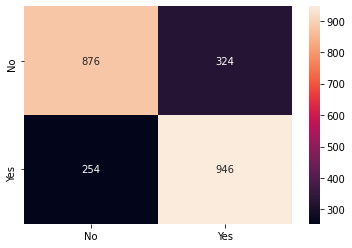

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])

sns.heatmap(df_cm, annot=True ,fmt='g')


Summary:
- The MobileNet Classifier Model has run successfully and shoown good results.
- The model for 15 Epochs has given Train Accuracy of 90.5%; Vaildation Accuracy of 75.9%
- The Model has predicted the test data with reasonable confidence levels; the confusion matrix has been printed as a heat map.
- False Negative has been at 254 out of 1200 predicted as Negative
- The has then been saved for future use.